In [1]:
import libpysal as ps
import numpy
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn
import numpy as np


/home/miguel/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.4-CAPI-1.17.4) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


In [6]:
# Loas data
gdf = gpd.read_file("./shapefiles(1)/cuencas_10km_2/basins.shp")
gdf_2 = gpd.read_file("./shapefiles(1)/cuencas_bigonly/basins.shp")


gdf

,ID,river_mouth,center_x,center_y,drainage_ar,outlet_elev,mean_el,max_el,mean_ksn,mean_gradie,se_el,se_ksn,se_gradient,hyp_int,theta,chi_r2,geometry
0,1,116,683796.297323,1153812.125,7050.714371,47,830.366821,5455,146.530962,0.278880,0.573481,2.780130,0.000165,0.147496,-2.057715,0.150485,"POLYGON ((627774.786 1125987.125, 627774.786 1..."
1,2,88,611100.824097,1127462.125,3125.340756,49,424.304962,3087,61.608111,0.162330,0.451407,2.033246,0.000175,0.127100,-4.060059,0.474727,"POLYGON ((574878.080 1126087.125, 574878.080 1..."
2,3,208,732743.249377,1207562.125,2707.912744,67,590.305908,4239,125.621644,0.222867,0.542782,10.806887,0.000204,0.163848,-2.418750,0.217524,"POLYGON ((676121.775 1207787.125, 676121.775 1..."
3,4,15,619450.304172,1170162.125,2283.728074,1,1560.150879,5697,234.432055,0.328857,1.526268,7.487155,0.000276,0.276909,-0.682813,0.445816,"POLYGON ((572328.238 1183137.125, 572328.238 1..."
4,5,16,619500.301059,1170162.125,2283.658083,1,1560.198730,5697,234.440722,0.328866,1.526288,7.487046,0.000276,0.276917,-0.682324,0.447966,"POLYGON ((572328.238 1183137.125, 572328.238 1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3009,3010,20067,622500.114259,1177612.125,2.227223,936,1293.450073,1911,201.245680,0.434032,6.701403,80.129652,0.006644,0.370291,0.354004,0.974986,"POLYGON ((621625.169 1178037.125, 621625.169 1..."
3010,3011,38001,585802.399440,1206612.125,2.192227,6,8.367161,14,6.540550,0.018930,0.074951,6.427446,0.000407,0.603815,-1.622070,-0.083884,"POLYGON ((584777.463 1206537.125, 584777.463 1..."
3011,3012,39001,585802.399440,1206612.125,2.192227,6,8.367161,14,6.562540,0.018930,0.074951,6.436426,0.000407,0.603815,-1.607422,-0.084127,"POLYGON ((584777.463 1206537.125, 584777.463 1..."
3012,3013,45001,585802.399440,1206612.125,2.192227,6,8.367161,14,6.603076,0.018930,0.074951,6.452978,0.000407,0.603815,-1.580957,-0.084546,"POLYGON ((584777.463 1206537.125, 584777.463 1..."


In [14]:
# Prepare data
data_Y = gdf['mean_ksn'].values.reshape((-1,1))
data_X = gdf[['mean_gradie', 'drainage_ar']].values
u = gdf['center_x']
v = gdf['center_y']
coords = list(zip(u,v))

In [26]:
# estandarizar datos
data_X = (data_X - data_X.mean(axis=0)) / data_X.std(axis=0)
data_Y = data_Y.reshape((-1,1))
data_Y = (data_Y - data_Y.mean(axis=0)) / data_Y.std(axis=0)


In [29]:
#Calibrate GWR model
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW

gwr_selector = Sel_BW(coords, data_Y, data_X)

gwr_bw = gwr_selector.search()
print(gwr_bw)

45.0


In [30]:
gwr_results = GWR(coords, data_Y, data_X, gwr_bw).fit()

In [31]:
np.shape(gwr_results.params)

(3014, 2)

In [32]:
gwr_results.params[0:5]

array([[-0.33588574,  0.56918861],
       [-0.60272177,  0.31165265],
       [-0.03467829,  0.76747852],
       [ 0.32033162,  0.0632797 ],
       [ 0.31971078,  0.06658353]])

In [33]:
np.float = np.float64
gwr_results.summary()


Model type                                                         Gaussian
Number of observations:                                                3014
Number of covariates:                                                     2

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                            676.547
Log-likelihood:                                                   -2025.191
AIC:                                                               4054.382
AICc:                                                              4056.390
BIC:                                                             -23452.655
R2:                                                                   0.776
Adj. R2:                                                              0.775

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [35]:
#Prepare GWR results for mapping

#Add GWR parameters to GeoDataframe
gdf['gwr_intercept'] = gwr_results.params[:,0]
gdf['gwr_fb'] = gwr_results.params[:,1]

#Obtain t-vals filtered based on multiple testing correction
gwr_filtered_t = gwr_results.filter_tvals()

<Axes: >

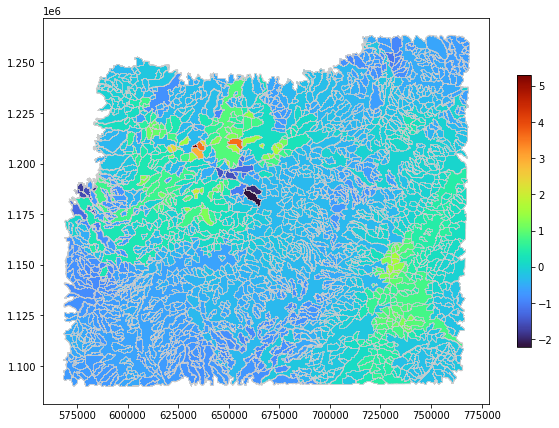

In [37]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
gdf.plot(column='gwr_intercept', cmap='turbo', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True,     legend_kwds={
        "shrink":.5
    })

In [38]:
# Fit GWR model using the current bandwidth
model = GWR(coords, data_Y, data_X, 10000, kernel='gaussian',fixed=True).fit()

model.summary()

Model type                                                         Gaussian
Number of observations:                                                3014
Number of covariates:                                                     2

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                            676.547
Log-likelihood:                                                   -2025.191
AIC:                                                               4054.382
AICc:                                                              4056.390
BIC:                                                             -23452.655
R2:                                                                   0.776
Adj. R2:                                                              0.775

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

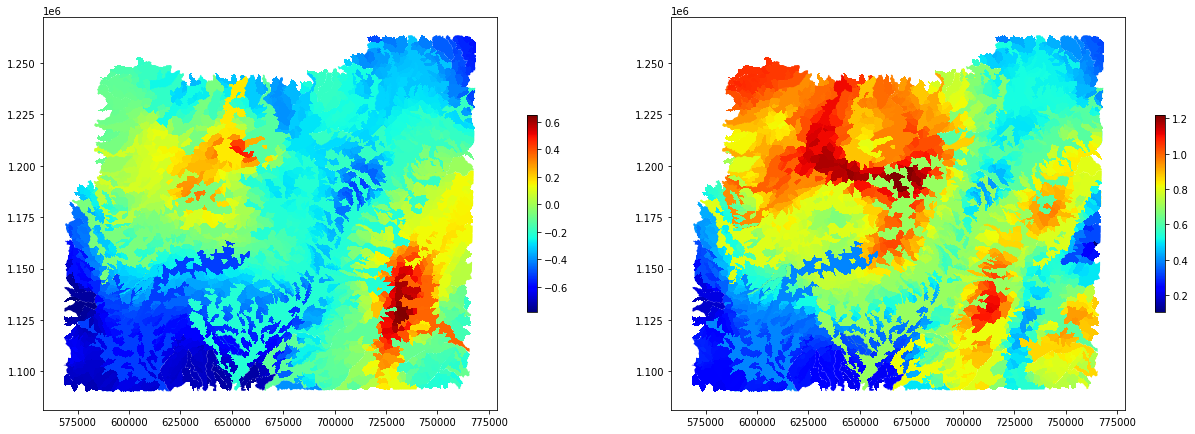

In [60]:
# Extract and plot the local coefficients for each covariate
local_params = model.params

# Create a single plot with three columns for each covariate (elevation, relief, and rainfall)
param_names = ['mean_gradie', 'drainage_ar']
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Transform geometries to WGS84 (EPSG:4326) before plotting
#data_clean = gdf.to_crs(epsg=4326)

for i, param_name in enumerate(param_names):
    ax = axes[i]
    gdf[f'coef_{param_name}'] = local_params[:, i] #tengo +1 para qeu no considere el primer coeficiente que pertenece al intercepto
    gdf.plot(column=f'coef_{param_name}', ax=ax, cmap=plt.cm.jet, legend=True, legend_kwds={"shrink":.5})

    
# Save the entire figure with all three subplots
plt.tight_layout()
plt.show()

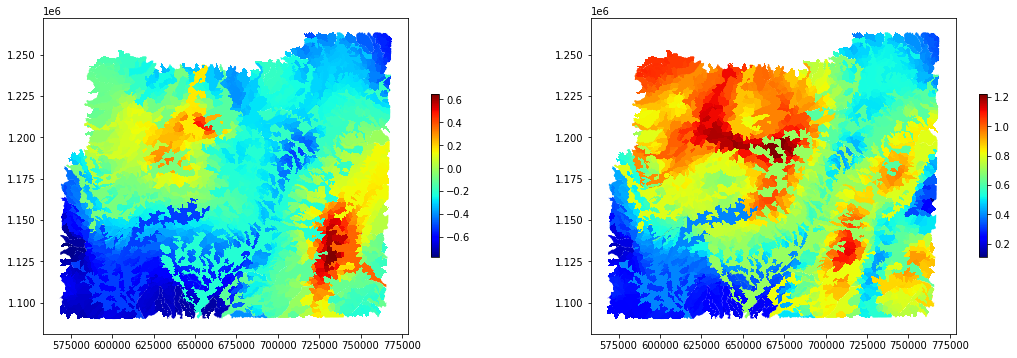

In [61]:
#Add GWR parameters to GeoDataframe
gdf['gwr_intercept'] = gwr_results.params[:,0]
gdf['gwr_fb'] = gwr_results.params[:,1]

param_names = ['gwr_intercept', 'gwr_fb']
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Transform geometries to WGS84 (EPSG:4326) before plotting
#data_clean = gdf.to_crs(epsg=4326)

for i, param_name2 in enumerate(param_names2):
    ax = axes[i]
    gdf[f'coef_{param_name2}'] = local_params[:, i] #tengo +1 para qeu no considere el primer coeficiente que pertenece al intercepto
    gdf.plot(column=f'coef_{param_name2}', ax=ax, cmap=plt.cm.jet, legend=True, legend_kwds={"shrink":.5})

<Axes: >

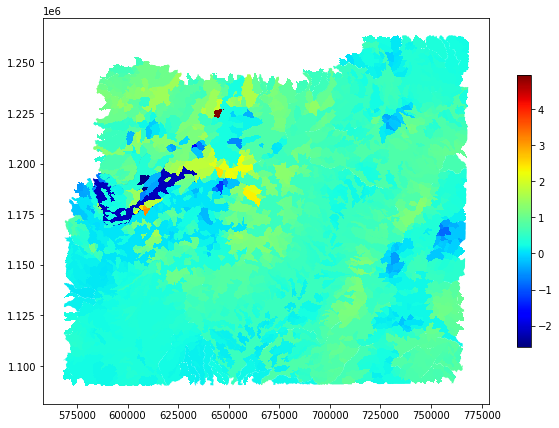

In [62]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
gdf.plot(column='gwr_fb', ax=ax, cmap=plt.cm.jet, legend=True, legend_kwds={"shrink":.5})

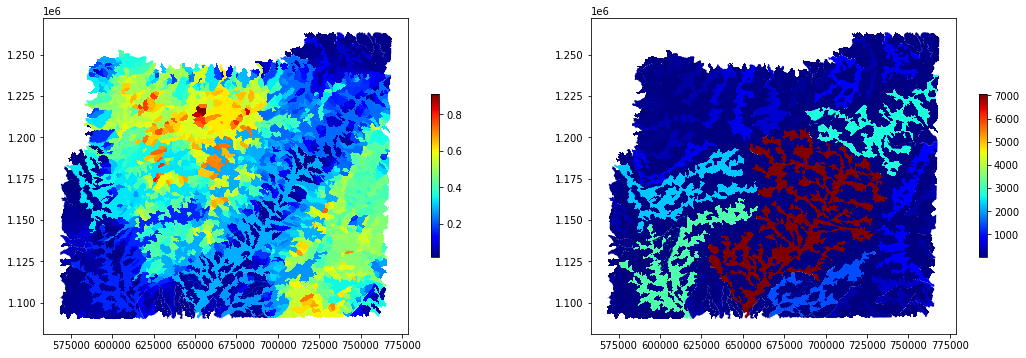

In [66]:
fig,axes = plt.subplots(1,2,figsize=(18,6))
gdf['gwr_intercept_2'] = (gwr_results.params[:,0] - gwr_results.params[:,0].mean(axis=0)) / gwr_results.params[:,0].std(axis=0)
gdf['gwr_fb_2'] = (gwr_results.params[:,1] - gwr_results.params[:,1].mean(axis=0)) / gwr_results.params[:,1].std(axis=0)
param_names2 = ['mean_gradie', 'drainage_ar']
for i, param_name2 in enumerate(param_names2):
    ax = axes[i]
    gdf.plot(column=f'{param_name2}', ax=ax, cmap=plt.cm.jet, legend=True, legend_kwds={"shrink":.5})
    

In [64]:
gdf

,ID,river_mouth,center_x,center_y,drainage_ar,outlet_elev,mean_el,max_el,mean_ksn,mean_gradie,...,gwr_intercept,gwr_fb,coef_mean_gradie,coef_drainage_ar,coef_gwr_intercept,coef_gwr_fb,gwr_intercept_2,gwr_fb_2,coef_gwr_intercept_2,coef_gwr_fb_2
0,1,116,683796.297323,1153812.125,7050.714371,47,830.366821,5455,146.530962,0.278880,...,-0.335886,0.569189,-0.222142,0.698099,-0.222142,0.698099,-0.294335,-0.024590,-0.222142,0.698099
1,2,88,611100.824097,1127462.125,3125.340756,49,424.304962,3087,61.608111,0.162330,...,-0.602722,0.311653,-0.516436,0.388064,-0.516436,0.388064,-0.691861,-0.426289,-0.516436,0.388064
2,3,208,732743.249377,1207562.125,2707.912744,67,590.305908,4239,125.621644,0.222867,...,-0.034678,0.767479,-0.189494,0.610945,-0.189494,0.610945,0.154397,0.284699,-0.189494,0.610945
3,4,15,619450.304172,1170162.125,2283.728074,1,1560.150879,5697,234.432055,0.328857,...,0.320332,0.063280,-0.066826,0.792998,-0.066826,0.792998,0.683283,-0.813696,-0.066826,0.792998
4,5,16,619500.301059,1170162.125,2283.658083,1,1560.198730,5697,234.440722,0.328866,...,0.319711,0.066584,-0.066602,0.792552,-0.066602,0.792552,0.682358,-0.808543,-0.066602,0.792552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3009,3010,20067,622500.114259,1177612.125,2.227223,936,1293.450073,1911,201.245680,0.434032,...,0.080978,0.730817,0.085141,0.777319,0.085141,0.777319,0.326699,0.227515,0.085141,0.777319
3010,3011,38001,585802.399440,1206612.125,2.192227,6,8.367161,14,6.540550,0.018930,...,-0.423133,0.456191,-0.121190,0.716312,-0.121190,0.716312,-0.424313,-0.200842,-0.121190,0.716312
3011,3012,39001,585802.399440,1206612.125,2.192227,6,8.367161,14,6.562540,0.018930,...,-0.423133,0.456191,-0.121190,0.716312,-0.121190,0.716312,-0.424313,-0.200842,-0.121190,0.716312
3012,3013,45001,585802.399440,1206612.125,2.192227,6,8.367161,14,6.603076,0.018930,...,-0.423133,0.456191,-0.121190,0.716312,-0.121190,0.716312,-0.424313,-0.200842,-0.121190,0.716312


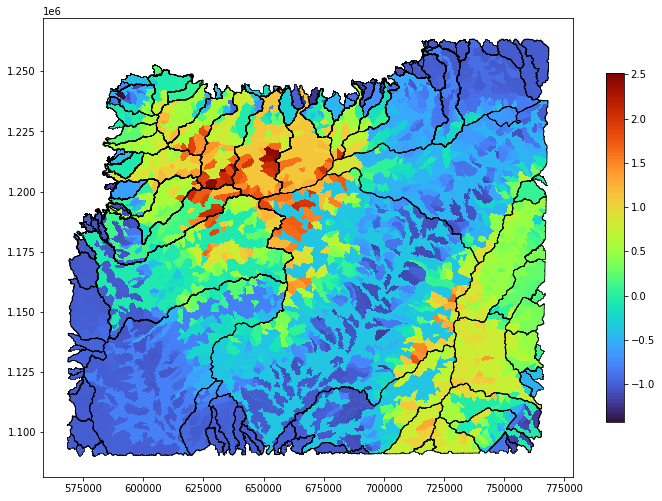

In [69]:
# Assuming model is the fitted MGWR model object
fig, ax = plt.subplots(figsize=(10, 10))
gdf["fitted"] = model.predy  # The predicted values (fitted values) from the MGWR model
gdf.plot(column="fitted", ax=ax, cmap=plt.cm.turbo, legend=True, legend_kwds={"shrink":.5})
gdf_2.boundary.plot(ax=ax, linewidth=0.8, edgecolor='black')
plt.tight_layout()
plt.show()